In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


In [2]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
train = pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv")
test = pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv")

In [4]:
train0=train[train['rating']==0]
train1=train[train['rating']==1]
train2=train[train['rating']==2]
train3=train[train['rating']==3]
train4=train[train['rating']==4]
train5=train[train['rating']==5]

In [5]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((30988, 11),
 (28718, 11),
 (72627, 11),
 (188972, 11),
 (313688, 11),
 (265007, 11))

In [6]:
train0=train0[:int(train0.shape[0]/100)]
train1=train1[:int(train1.shape[0]/100)]
train2=train2[:int(train2.shape[0]/100)]
train3=train3[:int(train3.shape[0]/100)]
train4=train4[:int(train4.shape[0]/100)]
train5=train5[:int(train5.shape[0]/100)]

In [7]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((309, 11), (287, 11), (726, 11), (1889, 11), (3136, 11), (2650, 11))

In [8]:
train=pd.concat([train0,train1,train2,train3,train4,train5],axis=0)

In [9]:
train.shape

(8997, 11)

In [10]:
train.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

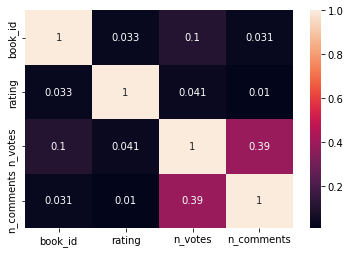

In [11]:
import seaborn as sns

#plotting the heatmap for correlation
ax = sns.heatmap(train.corr(), annot=True)

In [12]:
train = train.drop(['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'n_votes','read_at', 'started_at','n_comments'], axis = 1)

In [13]:
train

,rating,review_text
3,0,Recommended reading to understand what is goin...
7,0,Numerous people in publishing have told me thi...
13,0,Recommended by David Risher
54,0,"Well if Melanie says its her BBE, I gotta chec..."
58,0,"If steve recommends it, it must be good!"
...,...,...
8008,5,Loose ends are tied up and old mysteries are s...
8013,5,This was my most recent audio book. The narrat...
8022,5,Harold Fry receives a letter in the mail from ...
8028,5,"August was born with several problems, includi..."


In [14]:
test.columns


Index(['user_id', 'book_id', 'review_id', 'review_text', 'date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'],
      dtype='object')

In [15]:
test = test.drop(['user_id', 'book_id', 'review_id', 'date_added','date_updated', 'read_at', 'started_at','n_comments'], axis = 1)

In [16]:
test

,review_text,n_votes
0,** spoiler alert ** \n This is definitely one ...,1
1,"** spoiler alert ** \n ""You are what you drink...",1
2,Roar is one of my favorite characters in Under...,0
3,** spoiler alert ** \n If you feel like travel...,0
4,3.5 stars \n I read and enjoyed the first two ...,0
...,...,...
478028,Can't wait for Travis' POV \n Travis Before Ab...,0
478029,Had this on my to-read shelf forever. Will upd...,0
478030,The last book left me wanting for more. I need...,0
478031,Things are heating up in the second novel of I...,0


In [17]:
#Remove Hashtags
train['review_text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
train['review_text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
train['review_text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

train['review_text']=train['review_text'].str.lower()

In [18]:
#Remove Hashtags
test['review_text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
test['review_text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
test['review_text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

test['review_text'] = test['review_text'].str.lower()

In [19]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
train['review_text'] = train['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test['review_text'] = test['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
train.head()

,rating,review_text
3,0,recommended reading understand going middle am...
7,0,numerous people publishing told book year.
13,0,recommended david risher
54,0,"well melanie says bbe, gotta check out..."
58,0,"steve recommends it, must good!"


In [22]:
test.head()

,review_text,n_votes
0,** spoiler alert ** definitely one favorites a...,1
1,"** spoiler alert ** ""you drink."" i'm huge fan ...",1
2,roar one favorite characters never sky i'm hap...,0
3,** spoiler alert ** feel like travelling europ...,0
4,3.5 stars read enjoyed first two novels series...,0


In [23]:
train.shape

(8997, 2)

In [24]:
test.shape

(478033, 2)

In [25]:
train['rating'].value_counts()

4    3136
5    2650
3    1889
2     726
0     309
1     287
Name: rating, dtype: int64

In [26]:
y = train['rating']
x = train['review_text']

In [27]:
x.shape

(8997,)

In [28]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [29]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [31]:
X_temp.shape, X_test.shape, y_temp.shape, y_test.shape

((7197, 1000), (1800, 1000), (7197,), (1800,))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [33]:
accuracy = {'TF-IDF':[]}

# Logistic Regression

In [34]:
#TF-IDF
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[  5   2   3  13  25  21]
 [  0   5  17  13   9  12]
 [  0   2  23  47  45  23]
 [  0   0  20 148 153  47]
 [  2   0   9  77 398 143]
 [  1   0   6  34 190 307]]
              precision    recall  f1-score   support

           0       0.62      0.07      0.13        69
           1       0.56      0.09      0.15        56
           2       0.29      0.16      0.21       140
           3       0.45      0.40      0.42       368
           4       0.49      0.63      0.55       629
           5       0.56      0.57      0.56       538

    accuracy                           0.49      1800
   macro avg       0.49      0.32      0.34      1800
weighted avg       0.49      0.49      0.47      1800

0.4922222222222222


# Decision Tree

In [35]:
#TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[  0   0   0   0  63   6]
 [  0   0   0   0  47   9]
 [  0   0   0   0 123  17]
 [  0   0   0   0 320  48]
 [  0   0   0   0 469 160]
 [  0   0   0   0 324 214]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       368
           4       0.35      0.75      0.47       629
           5       0.47      0.40      0.43       538

    accuracy                           0.38      1800
   macro avg       0.14      0.19      0.15      1800
weighted avg       0.26      0.38      0.29      1800

0.3794444444444444


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [36]:
#TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(X_temp, y_temp)
y_predict_GB_tf = model_GB_tf.predict(X_test)
a=(model_GB_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[ 10   4   1  10  31  13]
 [  1   5  11  10  16  13]
 [  1   1  13  32  69  24]
 [  4   6  20  91 209  38]
 [  8   3   6  56 411 145]
 [  3   7   1  20 200 307]]
              precision    recall  f1-score   support

           0       0.37      0.14      0.21        69
           1       0.19      0.09      0.12        56
           2       0.25      0.09      0.14       140
           3       0.42      0.25      0.31       368
           4       0.44      0.65      0.53       629
           5       0.57      0.57      0.57       538

    accuracy                           0.47      1800
   macro avg       0.37      0.30      0.31      1800
weighted avg       0.45      0.47      0.44      1800

0.465


# Random Forest

In [37]:
#TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[  5   0   0  15  28  21]
 [  1   2   1  14  25  13]
 [  0   0   1  33  75  31]
 [  1   0   0  91 216  60]
 [  4   0   0  55 418 152]
 [  2   1   0  17 211 307]]
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        69
           1       0.67      0.04      0.07        56
           2       0.50      0.01      0.01       140
           3       0.40      0.25      0.31       368
           4       0.43      0.66      0.52       629
           5       0.53      0.57      0.55       538

    accuracy                           0.46      1800
   macro avg       0.49      0.27      0.26      1800
weighted avg       0.46      0.46      0.42      1800

0.4577777777777778


# K Nearest Neighbours

In [38]:
#TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[ 13  18   1  14  21   2]
 [  8  13   4   5  17   9]
 [ 13  24   9  23  62   9]
 [ 39  65  30  57 150  27]
 [ 66  99  41  87 271  65]
 [ 44  93  42  68 213  78]]
              precision    recall  f1-score   support

           0       0.07      0.19      0.10        69
           1       0.04      0.23      0.07        56
           2       0.07      0.06      0.07       140
           3       0.22      0.15      0.18       368
           4       0.37      0.43      0.40       629
           5       0.41      0.14      0.21       538

    accuracy                           0.24      1800
   macro avg       0.20      0.20      0.17      1800
weighted avg       0.31      0.24      0.25      1800

0.245


# EVALUATION

In [39]:
model = ['LR','DT','GB','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LR,0.492222
1,DT,0.379444
2,GB,0.465000
3,RF,0.457778
4,KN,0.245000
